In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
publicacionTotal=pd.read_csv('../archivoCSV-Properati/properati-AR-2015-07-01-properties-sell-six_months.csv',low_memory=False)

### ELIMINAMOS COLUMNAS QUE NO APORTAN AL ESTUDIO

operation, place_with_parent_names, country_name, geonames_id, lat-lon, price, currency, price_aprox_local_currency, price_per_m2, properati_url, title, image_thumbnail

In [145]:
publicacionTotal.drop(['operation', 'place_with_parent_names', 'country_name','geonames_id', 'lat-lon', 'price', 'currency', 'price_aprox_local_currency', 'price_per_m2', 'properati_url', 'title', 'image_thumbnail'],axis=1,inplace=True)

In [146]:
DatosGBA = publicacionTotal.loc[publicacionTotal.state_name.str.contains('Bs.As.'),:]
DatosCapFed = publicacionTotal.loc[publicacionTotal.state_name.str.contains('Capital Federal'),:]

## Filtro los datos por Cap Fed y GBA

CHICOS: ESTO LO PODRIAMOS COLOCAR ANTES DE ARRANCAR TODAS LAS VISUALIZACIONES, SOLO PARA COLOCAR EN EL INFORME CON CTOS DATOS CONTAMOS 

In [147]:
DatosCapFed.loc[:, 'state_name'].value_counts()

Capital Federal    7386
Name: state_name, dtype: int64

In [148]:
DatosGBA.loc[:, 'state_name'].value_counts()

Bs.As. G.B.A. Zona Norte    16257
Bs.As. G.B.A. Zona Oeste     9043
Bs.As. G.B.A. Zona Sur       2835
Name: state_name, dtype: int64

# Limpieza
CHICOS: ME OLVIDE COMENTARLES, QUE TB ME PARECE LOGICO FILTRAR LOS NANS QUE APAREZCA EN PROPERTY_TYPE; APARTE DE LAS OTRAS 2 VARIABLES QUE APARARECE EN "FILTRAMOS POR PRECIOS NAN'S YA QUE CONSIDERAMOS QUE NO APORTAN AL ESTUDIO DE DATOS:" DEL TP_FINAL

  Eliminamos los NAN'S que aparece en las columnas price_usd_per_m2 , surface_total_in_m2 y property_type. Esto se 
 considera así ya que al ser una Inmobiliaria no tiene sentido que no exista datos en esas 3 columnas.

In [149]:
DatosCapFed.dropna(subset=['price_usd_per_m2','surface_total_in_m2','property_type'],inplace=True)
DatosGBA.dropna(subset=['price_usd_per_m2','surface_total_in_m2','property_type'],inplace=True)


/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
DatosCapFed.loc[:, 'state_name'].value_counts()

Capital Federal    4527
Name: state_name, dtype: int64

### Obs: Durante el barrido de limpieza hemos observado que dentro de los Datos Cap Fed, se encontraba como barrio Cap Fed, esto lo hemos considerado un absurdo ya que no existe dicho barrio. A continuación se deja como muestra el barrio Cap Fed 

In [151]:
grouped = DatosCapFed.loc[:,['place_name','property_type']].groupby('place_name')
grouped.get_group('Capital Federal')

,place_name,property_type
3545,Capital Federal,apartment
6346,Capital Federal,house
6915,Capital Federal,house
7354,Capital Federal,PH
8900,Capital Federal,house
10792,Capital Federal,apartment
12505,Capital Federal,apartment
12511,Capital Federal,store
22059,Capital Federal,store
23380,Capital Federal,PH


In [152]:
DatosGBA.loc[:, 'state_name'].value_counts()

Bs.As. G.B.A. Zona Norte    11625
Bs.As. G.B.A. Zona Oeste     3288
Bs.As. G.B.A. Zona Sur       1471
Name: state_name, dtype: int64

#### Eliminamos los barrios que aparece con el nombre de Capital Federal

In [153]:
DatosCapFed=DatosCapFed[DatosCapFed['place_name']!='Capital Federal']

# Análisis de propiedades en relación a los barrios

###  1) Verificamos con cuantos datos contamos de property_type

In [154]:
DatosCapFed.loc[:,'property_type'].value_counts()

apartment    3741
house         263
PH            255
store         177
Name: property_type, dtype: int64

In [155]:
DatosGBA.loc[:,'property_type'].value_counts()

house        10395
apartment     4743
PH             964
store          282
Name: property_type, dtype: int64

### 2) Filtramos las columnas con las que vamos a trabajar

In [156]:
PropiedadesCapFed=DatosCapFed[['property_type', 'place_name','surface_total_in_m2',
                               'price_usd_per_m2']]

In [157]:
PropiedadesGBA=DatosGBA[['property_type', 'place_name','state_name','surface_total_in_m2',
                               'price_usd_per_m2']]

### 3) Limpieza de Nans que pueda existir en la columna place_name 

Obs: En la limpieza hemos detectado que dentro de los barrios de Cap Fed registra un barrio como Cap Fed, esto lo hemos considerado un absurdo; por ende también lo vamos a eliminar

In [158]:
PropiedadesCapFed.dropna(subset=['place_name'],inplace=True)
PropiedadesGBA.dropna(subset=['place_name'],inplace=True)

/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4) Verificamos cuantos datos se han limpiado

In [159]:
PropiedadesCapFed.loc[:,'property_type'].value_counts()

apartment    3741
house         263
PH            255
store         177
Name: property_type, dtype: int64

In [160]:
PropiedadesGBA.loc[:,'property_type'].value_counts()

house        10393
apartment     4743
PH             964
store          282
Name: property_type, dtype: int64

### 5) Ordenamos en forma ascendete el precio de las propiedades con el fin de verificar si existen anomalías 

No se detecto anomalías

In [161]:
TiendasEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='store',:].sort_values('price_usd_per_m2',ascending=True)

In [162]:
TiendasEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='store',:].sort_values('price_usd_per_m2',ascending=True)

In [163]:
DptoEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='apartment',:].sort_values('price_usd_per_m2',ascending=True)

In [164]:
DptoEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='apartment',:].sort_values('price_usd_per_m2',ascending=True)

In [165]:
PHEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='PH',:].sort_values('price_usd_per_m2',ascending=True)

In [166]:
PHEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='PH',:].sort_values('price_usd_per_m2',ascending=True)

In [167]:
CasasEnCapFed=PropiedadesCapFed.loc[PropiedadesCapFed.property_type=='house',:].sort_values('price_usd_per_m2',ascending=True)

In [168]:
CasasEnGBA=PropiedadesGBA.loc[PropiedadesGBA.property_type=='house',:].sort_values('price_usd_per_m2',ascending=True)

### 6) Resultados y gráficos

#### PREGUNTA: ¿CUAL ES EL BARRIO CON MAYOR Y MENOR CANTIDAD DE VENTAS REGISTRADAS DE TODAS LAS PROPIEDADES?
RTA:

CHICOS: ESTO ES OPTATIVO, POR SI LO QUIEREN COLOCAR EN EL INFORME

In [169]:
PropiedadesCapFed.loc[:,'place_name'].value_counts()

Belgrano                431
Palermo                 382
Almagro                 305
Villa Crespo            283
Caballito               220
Villa Urquiza           206
Boedo                   191
Barrio Norte            187
Nuñez                   177
Saavedra                136
Recoleta                132
Flores                  125
San Telmo               123
Balvanera               120
San Cristobal           107
Parque Chacabuco         79
Puerto Madero            79
Barracas                 75
Coghlan                  62
Palermo Hollywood        61
Floresta                 59
Congreso                 57
Villa Devoto             54
Villa del Parque         54
Villa Lugano             53
Once                     52
Colegiales               47
Parque Patricios         41
Retiro                   41
Monserrat                39
Mataderos                38
Palermo Chico            34
Boca                     33
Paternal                 30
San Nicolás              29
Palermo Soho        

#### 6.1) Cap Fed:  Histogramas según  la cantidad y promedio de propiedades en cada barrio  

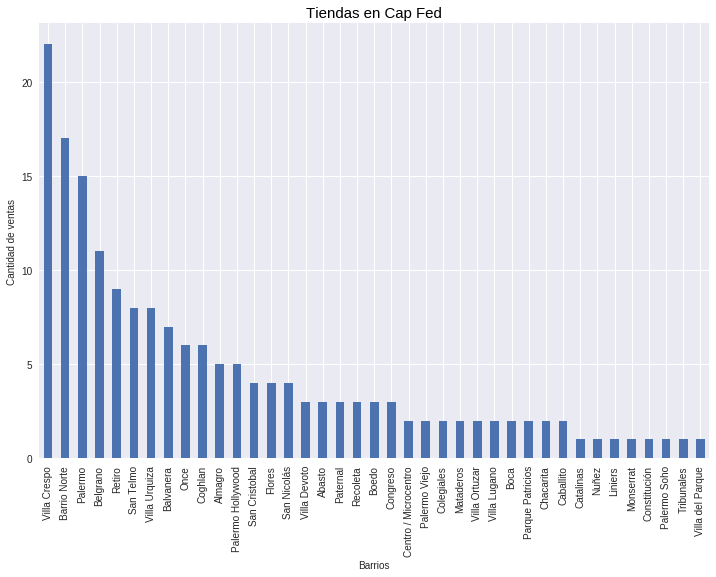

In [170]:
f = plt.figure()

plt.title ('Tiendas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

TiendasCapFed_hist = TiendasEnCapFed['place_name'].value_counts()
TiendasCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));


In [171]:
GrupoTiendas=TiendasEnCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean','count']).sort_values(('price_usd_per_m2','mean'), ascending=False)
GrupoTiendas    

price_usd_per_m2      
                                 mean count
place_name                                 
Recoleta                  5100.697542     3
Palermo                   4538.539745    15
Barrio Norte              4234.932565    17
Palermo Soho              4000.000000     1
Tribunales                3950.000000     1
Palermo Viejo             3870.689655     2
Balvanera                 3716.812032     7
Villa Crespo              3414.138540    22
Catalinas                 3217.391304     1
Palermo Hollywood         3160.467430     5
Retiro                    3121.349173     9
Once                      3097.575486     6
Belgrano                  3055.265872    11
Coghlan                   2850.187932     6
Nuñez                     2791.666667     1
Boedo                     2563.559823     3
San Nicolás               2369.235812     4
Villa Urquiza             2346.826710     8
Villa Devoto              2332.256079     3
Almagro                   2297.564184     5
Centro / Microcentro      2254.073927     2
Congreso                  2194.706756     3
Abasto                    2175.775776     3
Chacarita                 2058.201058     2
San Telmo                 1933.228667     8
Colegiales                1912.991236     2
Parque Patricios          1687.970783     2
Flores                    1505.850834     4
Caballito                 1404.312668     2
Villa del Parque          1375.000000     1
Villa Ortuzar             1329.409306     2
Villa Lugano              1200.483092     2
Boca                      1162.878788     2
Constitución              1100.000000     1
San Cristobal             1055.546705     4
Paternal                   971.100216     3
Monserrat                  804.828974     1
Mataderos                  800.531915     2
Liniers                    740.000000     1

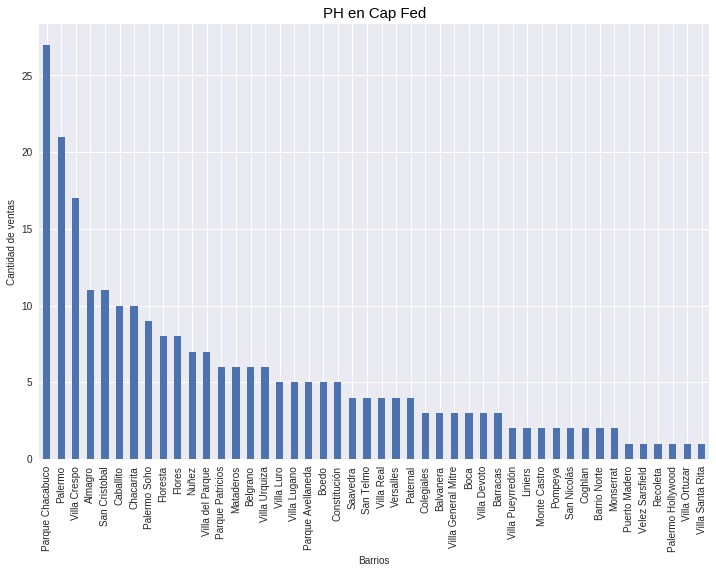

In [172]:
f = plt.figure()

plt.title ('PH en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

PHCapFed_hist = PHEnCapFed['place_name'].value_counts()
PHCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

In [173]:
GrupoPH=PHEnCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean','count']).sort_values(('price_usd_per_m2','mean'), ascending=False)
GrupoPH       

price_usd_per_m2      
                                mean count
place_name                                
Coghlan                  2260.808271     2
Palermo Soho             2088.856400     9
Velez Sarsfield          2009.090909     1
Belgrano                 2008.038339     6
Palermo Hollywood        1902.777778     1
Villa Devoto             1892.735455     3
Villa Crespo             1886.682768    17
Parque Chacabuco         1808.129184    27
Palermo                  1782.626913    21
Chacarita                1782.461232    10
Saavedra                 1723.754283     4
Parque Patricios         1695.766174     6
San Telmo                1599.883901     4
Boedo                    1585.660831     5
Monte Castro             1550.000000     2
Nuñez                    1529.040507     7
Almagro                  1508.701809    11
Versalles                1507.762629     4
Villa Ortuzar            1453.846154     1
Caballito                1447.497332    10
Mataderos                1442.090763     6
Villa Santa Rita         1410.588235     1
Barracas                 1386.931397     3
Barrio Norte             1336.174944     2
Liniers                  1328.717949     2
Boca                     1323.498139     3
San Cristobal            1305.991096    11
Colegiales               1276.803752     3
Floresta                 1270.828424     8
Villa del Parque         1269.109832     7
Villa Real               1267.678267     4
Puerto Madero            1245.901639     1
Paternal                 1234.059174     4
Villa Luro               1223.654994     5
Villa Urquiza            1221.723521     6
Villa Pueyrredón         1196.581197     2
Monserrat                1152.941176     2
Balvanera                1138.693702     3
Parque Avellaneda        1126.299861     5
Villa General Mitre      1123.814720     3
Recoleta                 1100.000000     1
San Nicolás               957.272727     2
Flores                    916.715169     8
Constitución              901.831195     5
Villa Lugano              870.708842     5
Pompeya                   835.134807     2

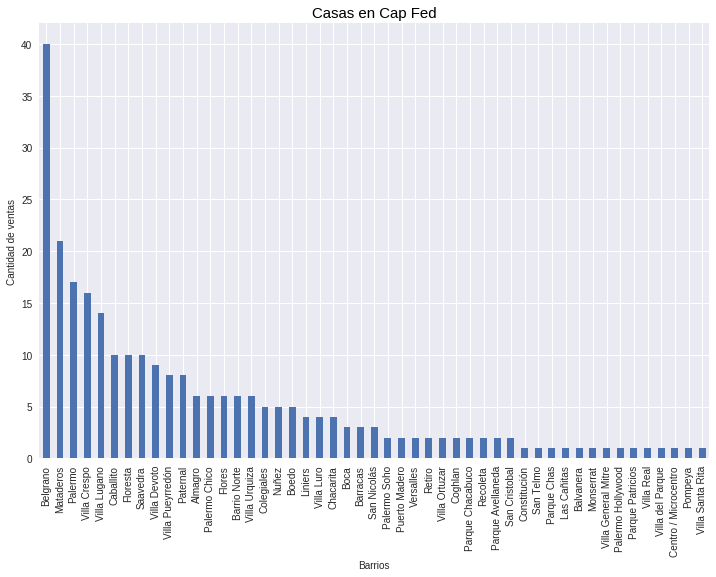

In [174]:
f = plt.figure()

plt.title ('Casas en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

CasasCapFed_hist = CasasEnCapFed['place_name'].value_counts()
CasasCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

In [175]:
GrupoCasas=CasasEnCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean','count']).sort_values(('price_usd_per_m2','mean'), ascending=False)
GrupoCasas   

price_usd_per_m2      
                                 mean count
place_name                                 
Palermo Chico            11668.821839     6
Recoleta                  7023.305085     2
Retiro                    5340.503140     2
Villa Urquiza             4799.551839     6
Puerto Madero             4499.443826     2
Palermo Hollywood         4351.851852     1
Palermo Soho              4215.151515     2
Las Cañitas               2760.563380     1
Belgrano                  2560.075818    40
Palermo                   2280.066707    17
Villa del Parque          2051.792829     1
Barrio Norte              1947.898575     6
Villa Crespo              1886.643942    16
Villa General Mitre       1880.000000     1
Balvanera                 1718.750000     1
Colegiales                1560.600009     5
Paternal                  1541.303891     8
Caballito                 1516.126299    10
Parque Chas               1487.500000     1
Nuñez                     1483.160125     5
Flores                    1436.816215     6
Villa Devoto              1323.774751     9
Saavedra                  1309.397175    10
Chacarita                 1301.772093     4
Almagro                   1291.390182     6
Liniers                   1261.213264     4
San Cristobal             1206.592957     2
Villa Pueyrredón          1205.729920     8
Villa Real                1204.819277     1
Coghlan                   1199.047619     2
Versalles                 1197.089947     2
Monserrat                 1154.545455     1
Boedo                     1116.513761     5
Villa Luro                1050.825522     4
Floresta                  1030.160662    10
Villa Ortuzar             1026.315789     2
Pompeya                    951.724138     1
San Telmo                  936.599424     1
Villa Santa Rita           903.225806     1
Barracas                   899.546478     3
Parque Patricios           875.000000     1
Mataderos                  865.905304    21
Villa Lugano               856.387362    14
Constitución               812.500000     1
Parque Avellaneda          801.530760     2
Boca                       730.257145     3
Parque Chacabuco           707.065307     2
Centro / Microcentro       585.714286     1
San Nicolás                473.203372     3

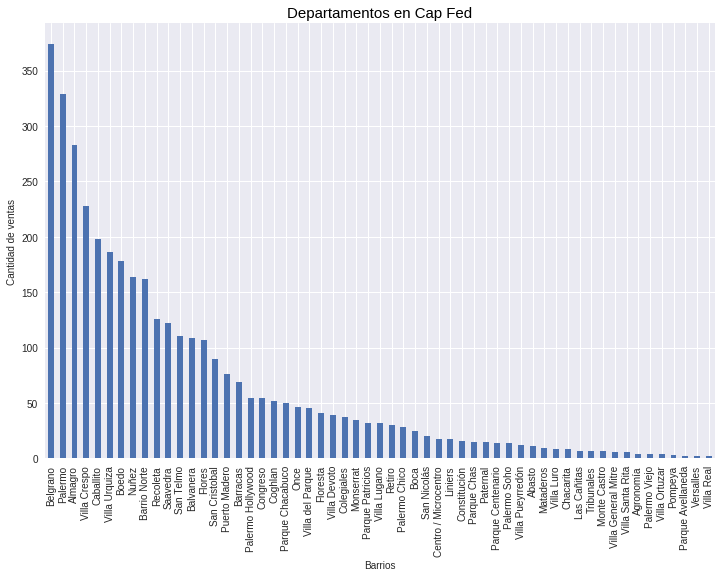

In [176]:
f = plt.figure()

plt.title ('Departamentos en Cap Fed',color='black', fontsize=15)
plt.ylabel('Cantidad de ventas', fontsize=10)
plt.xlabel('Barrios', fontsize=10)

DptoCapFed_hist = DptoEnCapFed['place_name'].value_counts()
DptoCapFed_hist.plot(kind='bar',rot=90,figsize=(12,8));

In [177]:
GrupoDpto=DptoEnCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean','count']).sort_values(('price_usd_per_m2','mean'), ascending=False)
GrupoDpto  

price_usd_per_m2      
                                 mean count
place_name                                 
Puerto Madero             5520.647977    76
Palermo Chico             4082.670490    28
Palermo                   3163.693415   329
Palermo Hollywood         2876.027420    54
Recoleta                  2812.064752   126
Belgrano                  2742.885854   374
Barrio Norte              2682.574539   162
Palermo Soho              2674.644121    14
Las Cañitas               2624.665836     7
Retiro                    2620.926149    30
Nuñez                     2578.091063   164
Villa Urquiza             2535.428987   186
Palermo Viejo             2442.739636     4
Colegiales                2368.212408    37
Villa Devoto              2272.913542    39
San Cristobal             2263.425482    90
Saavedra                  2262.585170   122
Monserrat                 2252.862124    35
Coghlan                   2208.789626    52
Villa Ortuzar             2196.067248     4
Barracas                  2173.701378    69
Agronomía                 2158.562226     4
Caballito                 2158.316927   198
Flores                    2115.716162   107
San Telmo                 2099.533164   110
Chacarita                 2069.916510     8
Villa Crespo              2059.218969   228
Villa Santa Rita          2025.346263     6
Boedo                     1981.419426   178
Centro / Microcentro      1965.732484    17
Parque Chacabuco          1899.748911    50
Villa del Parque          1897.671007    45
Paternal                  1894.623530    15
Abasto                    1881.145732    11
Parque Centenario         1868.729888    14
Congreso                  1866.097466    54
Parque Avellaneda         1838.474026     2
Liniers                   1829.425198    17
San Nicolás               1828.853593    20
Almagro                   1824.567591   283
Villa Real                1819.523810     2
Parque Patricios          1817.461375    32
Balvanera                 1798.117046   109
Villa Luro                1753.987954     8
Floresta                  1750.953913    41
Monte Castro              1740.066786     7
Once                      1710.263935    46
Versalles                 1689.117647     2
Tribunales                1670.843524     7
Parque Chas               1658.913165    15
Villa Pueyrredón          1648.479327    12
Mataderos                 1608.692239     9
Pompeya                   1476.283534     3
Constitución              1449.098488    16
Boca                      1420.898510    25
Villa Lugano              1178.980588    32
Villa General Mitre        930.059524     6

# Análisis de Expensas


###  1) Verificamos con cuantos datos contamos de expensas  y property_type

In [178]:
DatosGBA.loc[:,['state_name','property_type','expenses']].groupby(['state_name','property_type'])\
                .agg(['count']) 

expenses
                                          count
state_name               property_type         
Bs.As. G.B.A. Zona Norte PH                  16
                         apartment          237
                         house               74
                         store                9
Bs.As. G.B.A. Zona Oeste PH                  17
                         apartment          116
                         house               57
                         store                3
Bs.As. G.B.A. Zona Sur   PH                  11
                         apartment          231
                         house               90
                         store                8

In [179]:
DatosCapFed.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count'])

,expenses
,count
property_type,
PH,35
apartment,1151
house,3
store,16


### 2) Filtramos las 5 columnas; ya que para nuestro análisis de expensas será en base a las zonas, el tipo de propiedad y la superficie total por m2.

Nota: Consideramos superficie total por m2; ya que el fín de esto es encontrar alguna anomalía del valor de las expensas respecto a los datos que nos aporta superficie total m2.

In [180]:
ExpensasCapFed=DatosCapFed[['property_type','place_name','surface_total_in_m2',
                             'price_usd_per_m2','expenses']]

In [181]:
ExpensasGBA=DatosGBA[['property_type','place_name','state_name','surface_total_in_m2',
                             'price_usd_per_m2','expenses']]

### 3) Limpiamos los Nan's que exista en la columna expenses, place_name y  property_type; ya que las expensas será evaluado según el tipo de propiedad y barrio

In [182]:
ExpensasCapFed.dropna(subset=['expenses','place_name'],inplace=True)
ExpensasGBA.dropna(subset=['expenses','place_name'],inplace=True)

/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zoraida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4) verificamos ctos datos se han limpiado
Observamos que se realizo en forma correcta la limpieza, ya que la cantidad de datos que existe (según pto 2) coinciden


In [183]:
ExpensasGBA.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count'])  

,expenses
,count
property_type,
PH,44
apartment,584
house,220
store,20


In [184]:
ExpensasCapFed.loc[:,['property_type','expenses']].groupby(['property_type'])\
                .agg(['count'])  

,expenses
,count
property_type,
PH,35
apartment,1151
house,3
store,16


### 5) Ordenamos en forma descendentes las expensas con el fín de analizar si existen datos exageradamente fuera de los parámetros normales

#### 5.1) Análizamos las propiedades del tipo 'house' en Cap Fed
Vamos a considerar en limpiar los datos del tipo 'house' en Cap Fed, ya que en la realidad una propiedad de este tipo no suele pagar expensas; lo consideraremos este tipo de dato como un absurdo. A la vez al observar el monto de las expensas para esas 3 propiedades suma al absurdo.

In [185]:
ExpensasDelTipoCasaCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='house',:].sort_values('expenses',ascending=False)
ExpensasDelTipoCasaCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
36436,house,Barrio Norte,400.0,1475.000000,200.0
30788,house,Floresta,230.0,891.304348,1.0
36828,house,Villa Crespo,200.0,4250.000000,1.0


In [186]:
ExpensasCapFed=ExpensasCapFed[ExpensasCapFed['property_type']!='house']

#### 5.2) Análizamos las propiedades del tipo 'house' en GBA
     
  Consideraciones:

1) Un particular cuidado, ya que en la actualidad existe casas en barrios cerrados y cabe la posibilidad
de que paguen expensas.

2) Limpiaremos aquellos datos que aparezcan como expensas menor a $100; ya que lo consideramos como un absurdo


In [187]:
ExpensasDelTipoCasaGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='house',:].sort_values('expenses',ascending=False)
ExpensasDelTipoCasaGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
42271,house,San Vicente,Bs.As. G.B.A. Zona Sur,500.0,660.000000,29000.0
41984,house,Canning,Bs.As. G.B.A. Zona Sur,350.0,300.000000,12000.0
37300,house,Nordelta,Bs.As. G.B.A. Zona Norte,450.0,3155.555556,12000.0
42313,house,Nordelta,Bs.As. G.B.A. Zona Norte,398.0,3266.331658,10000.0
37732,house,Nordelta,Bs.As. G.B.A. Zona Norte,540.0,1574.074074,9000.0
38358,house,Nordelta,Bs.As. G.B.A. Zona Norte,600.0,2416.666667,8500.0
40301,house,Malvinas Argentinas,Bs.As. G.B.A. Zona Norte,1200.0,350.000000,8200.0
37293,house,Nordelta,Bs.As. G.B.A. Zona Norte,270.0,2500.000000,8000.0
42324,house,La Plata,Bs.As. G.B.A. Zona Sur,130.0,3307.692308,8000.0
961,house,Lanús,Bs.As. G.B.A. Zona Sur,1400.0,160.714286,7000.0


#### 5.3) Análizamos las propiedades del tipo 'PH' en Cap Fed
Consideraciones:

1)En la actualidad, existen PH que contratan en forma particular la limpieza de sus pasillos y arreglos como un 
gasto en comùn entre todos los propietarios y es considerado como parte del gasto de una expensa

2)Vamos a considerar en limpiar los datos de expensas menores a 100 y mayores a 1000 

In [188]:
ExpensasDelTipoPHCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='PH',:].sort_values('expenses',ascending=False)
ExpensasDelTipoPHCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
41275,PH,Almagro,110.0,2000.000000,1800.0
35301,PH,Almagro,118.0,2118.644068,1000.0
40318,PH,Villa Crespo,122.0,2090.163934,950.0
1252,PH,Palermo Soho,171.0,2046.783626,900.0
36710,PH,Belgrano,44.0,2147.727273,900.0
1247,PH,Palermo Soho,171.0,2046.783626,900.0
546,PH,Palermo Soho,171.0,2046.783626,900.0
1250,PH,Palermo Soho,171.0,2046.783626,900.0
1248,PH,Palermo Soho,171.0,2046.783626,900.0
1249,PH,Palermo Soho,171.0,2046.783626,900.0


#### 5.4) Análizamos las propiedades del tipo 'PH' en GBA
Consideraciones:

1)En la actualidad, existen propietarios de PH que contratan en forma particular la limpieza de sus pasillos y arreglos como un gasto en comùn entre todos los propietarios y es considerado como parte del gasto de una expensa

2)Vamos a considerar en limpiar los datos de expensas menores a 100 y mayores a 1000 

In [189]:
ExpensasDelTipoPHGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='PH',:].sort_values('expenses',ascending=False)
ExpensasDelTipoPHGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
19454,PH,Quilmes,Bs.As. G.B.A. Zona Sur,72.0,2083.333333,1700.0
3212,PH,Quilmes,Bs.As. G.B.A. Zona Sur,38.0,1578.947368,1300.0
8773,PH,Bernal,Bs.As. G.B.A. Zona Sur,50.0,1600.000000,650.0
18812,PH,Villa Ballester,Bs.As. G.B.A. Zona Norte,50.0,1440.000000,400.0
18813,PH,Villa Ballester,Bs.As. G.B.A. Zona Norte,50.0,1400.000000,400.0
18815,PH,Villa Ballester,Bs.As. G.B.A. Zona Norte,52.0,1346.153846,400.0
18737,PH,Olivos,Bs.As. G.B.A. Zona Norte,55.0,2527.272727,320.0
21982,PH,Ramos Mejía,Bs.As. G.B.A. Zona Oeste,59.0,1355.932203,300.0
16330,PH,Morón,Bs.As. G.B.A. Zona Oeste,37.0,1756.756757,295.0
34537,PH,Castelar,Bs.As. G.B.A. Zona Oeste,45.0,1111.111111,130.0


#### 5.5) Análizamos las propiedades del tipo Store en Cap Fed
Consideraciones:

1)En la actualidad, existen Store que se encuentran en la PB de un Edificio y ser parte de un mismo consorcio; por ende es posible que este no este exento en pagar expensas.

2)Vamos a considerar en limpiar los datos de expensas menores a 100

In [190]:
ExpensasDelTipoStoreCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='store',:].sort_values('expenses',ascending=False)
ExpensasDelTipoStoreCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
41616,store,San Nicolás,151.0,1801.324503,8300.0
36582,store,San Telmo,256.0,1015.625000,4500.0
41638,store,San Nicolás,115.0,3200.000000,4200.0
41619,store,San Nicolás,593.0,2529.510961,4000.0
12595,store,Barrio Norte,48.0,20833.333333,2500.0
28617,store,Almagro,70.0,616.253857,1650.0
40718,store,Belgrano,42.0,1190.476190,1200.0
32921,store,Balvanera,263.0,4942.965779,1111.0
41877,store,Belgrano,700.0,1857.142857,1111.0
41933,store,San Telmo,360.0,916.666667,1111.0


####  5.6) Análizamos las propiedades del tipo Store en GBA
Consideraciones:

1)En la actualidad, existen Store que se encuentran en la PB de un Edificio y ser parte de un mismo consorcio; por ende es posible que este no este exento en pagar expensas.

2)Vamos a considerar en limpiar los datos de expensas menores a 100

In [191]:
ExpensasDelTipoStoreGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='store',:].sort_values('expenses',ascending=False)
ExpensasDelTipoStoreGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
2330,store,Pilar,Bs.As. G.B.A. Zona Norte,72.0,1069.444444,3500.0
32699,store,Martínez,Bs.As. G.B.A. Zona Norte,300.0,1966.666667,3100.0
41900,store,Quilmes,Bs.As. G.B.A. Zona Sur,4500.0,555.555556,1111.0
42391,store,Avellaneda,Bs.As. G.B.A. Zona Sur,4290.0,1048.951049,1111.0
42303,store,Del Viso,Bs.As. G.B.A. Zona Norte,420.0,1142.857143,1111.0
41902,store,Olivos,Bs.As. G.B.A. Zona Norte,300.0,1333.333333,1111.0
42477,store,Banfield,Bs.As. G.B.A. Zona Sur,36.0,1388.888889,170.0
42130,store,Boulogne Sur Mer,Bs.As. G.B.A. Zona Norte,232.0,1831.896552,111.0
42069,store,La Plata,Bs.As. G.B.A. Zona Sur,20.0,5500.000000,70.0
41367,store,Lanús,Bs.As. G.B.A. Zona Sur,50.0,2200.000000,10.0


####  5.7) Análizamos las propiedades del tipo Apartment en Cap Fed
Consideraciones:

1)Vamos a considerar en limpiar los datos de expensas menores a 100

2)CHICOS QUE OPINAN EN LAS EXPENSAS MAYORES A 10000???????????????????? 

In [192]:
ExpensasDelTipoDepCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='apartment',:].sort_values('expenses',ascending=False)
ExpensasDelTipoDepCapFed

,property_type,place_name,surface_total_in_m2,price_usd_per_m2,expenses
3453,apartment,Puerto Madero,444.0,4954.954955,35500.0
38457,apartment,Palermo,115.0,6434.782609,35000.0
19440,apartment,Belgrano,280.0,4464.285714,20000.0
37625,apartment,Recoleta,268.0,2425.373134,19625.0
38277,apartment,Barrio Norte,370.0,3783.783784,19000.0
3202,apartment,Almagro,466.0,836.909871,17000.0
32885,apartment,Palermo Chico,260.0,3769.230769,15000.0
39485,apartment,Nuñez,600.0,1166.666667,14000.0
31094,apartment,Palermo,232.0,2327.586207,13000.0
39263,apartment,Palermo,288.0,3298.611111,13000.0


#### 5.8) Análizamos las propiedades del tipo Apartment en GBA
Consideraciones:

1)Vamos a considerar en limpiar los datos de expensas menores a 100

2)CHICOS QUE OPINAN EN LAS EXPENSAS MAYORES A 10000????????????????????

In [193]:
ExpensasDelTipoDepGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='apartment',:].sort_values('expenses',ascending=False)
ExpensasDelTipoDepGBA

,property_type,place_name,state_name,surface_total_in_m2,price_usd_per_m2,expenses
41814,apartment,Nordelta,Bs.As. G.B.A. Zona Norte,207.0,2657.004831,11000.0
31736,apartment,San Isidro,Bs.As. G.B.A. Zona Norte,166.0,2530.120482,8500.0
18996,apartment,San Isidro,Bs.As. G.B.A. Zona Norte,209.0,3062.200957,7000.0
41758,apartment,Nordelta,Bs.As. G.B.A. Zona Norte,125.0,2800.000000,7000.0
38323,apartment,Nordelta,Bs.As. G.B.A. Zona Norte,111.0,2657.657658,6500.0
36920,apartment,Olivos,Bs.As. G.B.A. Zona Norte,132.0,2500.000000,6000.0
41789,apartment,Nordelta,Bs.As. G.B.A. Zona Norte,129.0,2209.302326,5800.0
41316,apartment,Banfield,Bs.As. G.B.A. Zona Sur,80.0,1937.500000,5300.0
35992,apartment,San Fernando,Bs.As. G.B.A. Zona Norte,113.0,2566.371681,5100.0
26397,apartment,Nordelta,Bs.As. G.B.A. Zona Norte,128.0,2109.375000,5000.0


### 6) Filtramos los datos, según lo analizado en el punto 5

In [194]:
grupoDepCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='apartment',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)    

In [195]:
grupoTiendasCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='store',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [196]:
grupoPHCapFed=ExpensasCapFed.loc[ExpensasCapFed.property_type=='PH',:].loc[ExpensasCapFed.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [197]:
grupoDepGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='apartment',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [198]:
grupoCasasGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='house',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [199]:
grupoTiendasGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='store',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

In [126]:
grupoPHGBA=ExpensasGBA.loc[ExpensasGBA.property_type=='PH',:].loc[ExpensasGBA.expenses>100,:]\
        .sort_values('expenses',ascending=False)

## 6) Resultados y gráficos

### 6.1) Cap Fed: Histogramas según la cantidad y promedio de propiedades en cada barrio

In [200]:
Dpto=grupoDepCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
Dpto

,price_usd_per_m2
,mean
place_name,
Puerto Madero,5144.386140
Palermo Chico,3591.148605
Palermo Hollywood,3091.523447
Belgrano,2772.482048
Retiro,2683.012450
Las Cañitas,2680.576908
Palermo,2598.549702
Recoleta,2577.822880


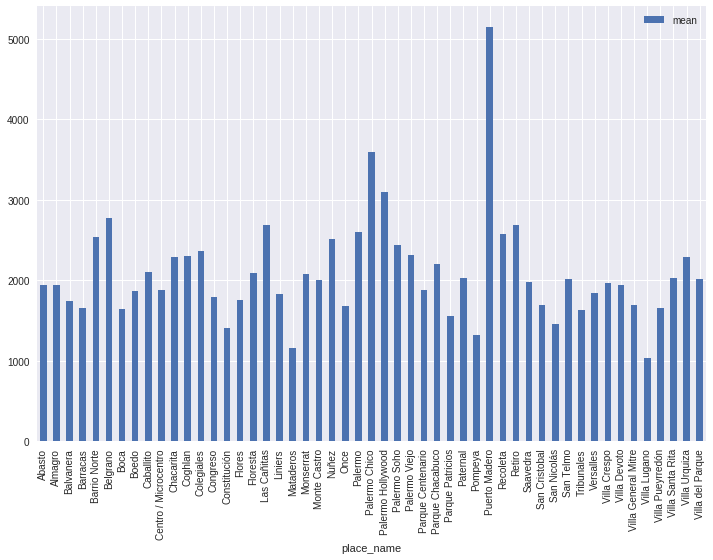

In [201]:
Dpto.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));

In [202]:
Tiendas=grupoTiendasCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
Tiendas

,price_usd_per_m2
,mean
place_name,
Barrio Norte,11716.666667
Balvanera,4942.965779
San Nicolás,2510.278488
Caballito,1714.285714
Belgrano,1523.809524
San Telmo,966.145833
Almagro,616.253857


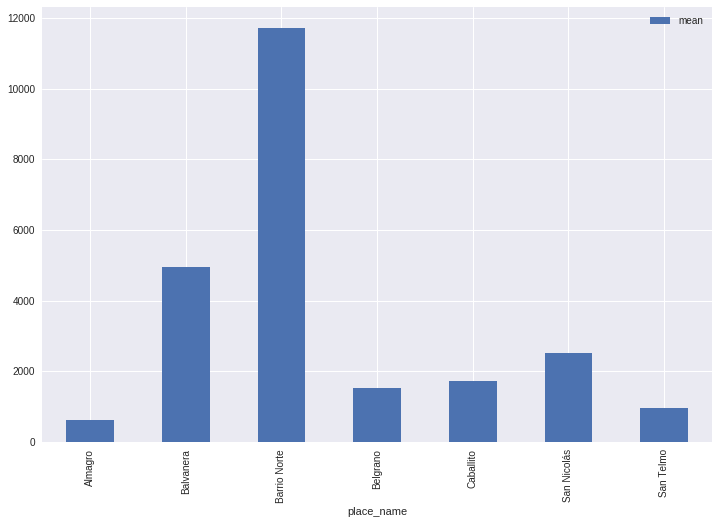

In [203]:
Tiendas.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));

In [207]:
PH=grupoPHCapFed.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
PH   

,price_usd_per_m2
,mean
place_name,
Belgrano,2147.727273
Palermo Soho,2068.713450
Villa Crespo,2035.984860
Almagro,1777.428874
Parque Chacabuco,1761.904762
Palermo,1677.419355
Barrio Norte,1619.718310
Villa Pueyrredón,1615.384615


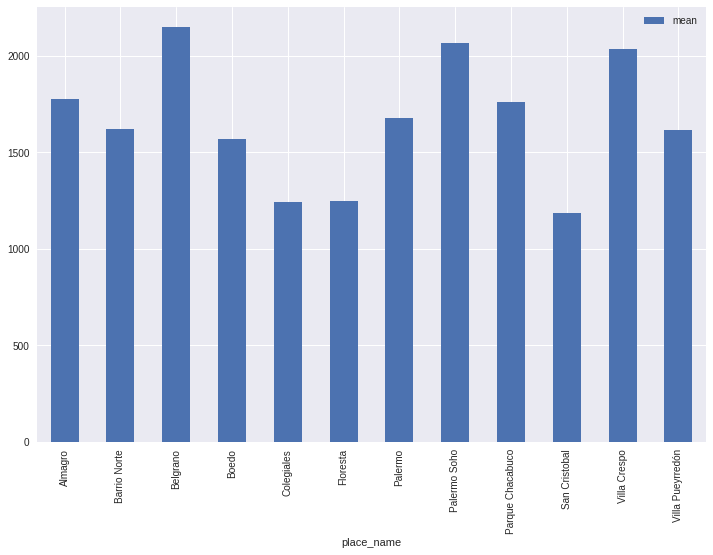

In [208]:
PH.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));

### 6.1) GBA: Histogramas según la cantidad y promedio de propiedades en cada barrio

In [210]:
DptoGBA=grupoDepGBA.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
DptoGBA

,price_usd_per_m2
,mean
place_name,
Santa Barbara Barrio Cerrado,3500.000000
Barrio El Golf,3000.000000
Enyoi,2741.935484
Vicente López,2675.579281
Martínez,2674.966001
Acassuso,2586.956522
Olivos,2566.518007
Lanús Oeste,2395.833333


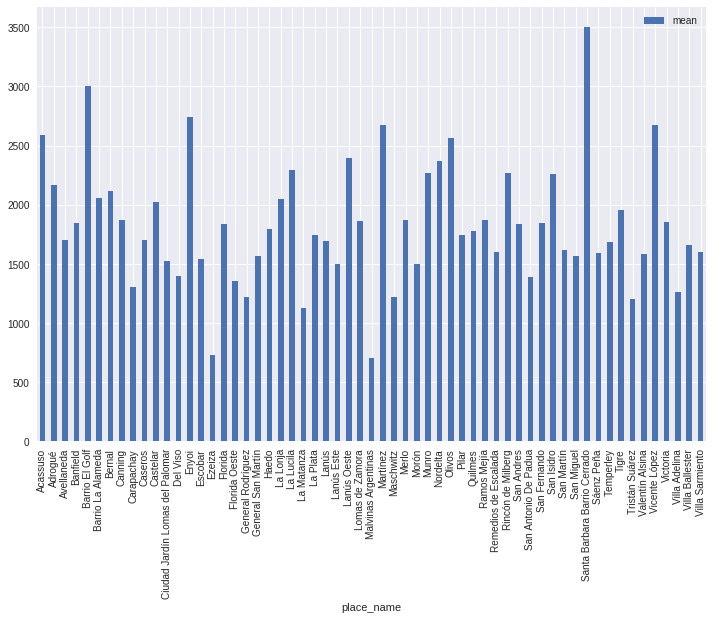

In [211]:
DptoGBA.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));

In [212]:
CasasGBA=grupoCasasGBA.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
CasasGBA

,price_usd_per_m2
,mean
place_name,
Barrio Los Alisos,2370.370370
Barrio Los Castores,2287.462093
La Plata,2226.495726
Nordelta,2126.191226
Adrogué,2114.789005
Tigre,2106.416483
El Talar de Pacheco,1807.228916
El Rocío,1702.127660


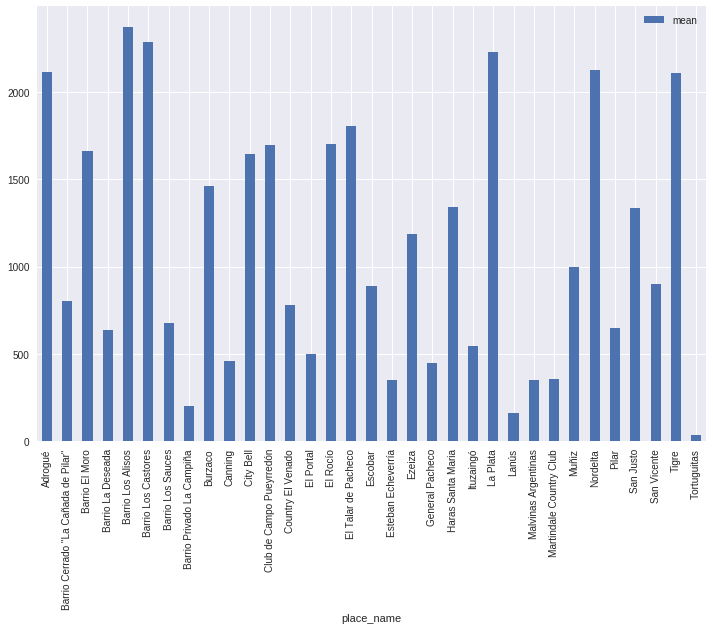

In [213]:
CasasGBA.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));

In [214]:
CasasGBA=grupoTiendasGBA.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
CasasGBA

,price_usd_per_m2
,mean
place_name,
Martínez,1966.666667
Boulogne Sur Mer,1831.896552
Banfield,1388.888889
Olivos,1333.333333
Del Viso,1142.857143
Pilar,1069.444444
Avellaneda,1048.951049
Quilmes,555.555556


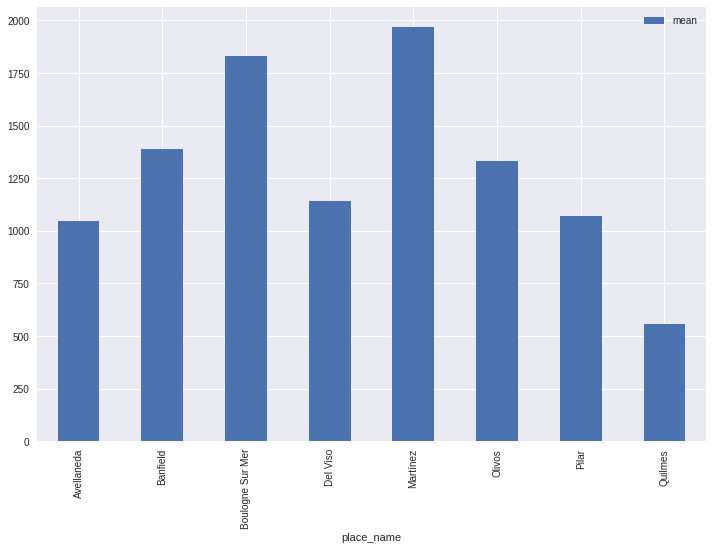

In [215]:
CasasGBA.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));

In [216]:
PHGBA=grupoPHGBA.loc[:,['place_name','price_usd_per_m2']].groupby(['place_name'])\
                .agg(['mean']).sort_values(('price_usd_per_m2','mean'), ascending=False)
PHGBA

,price_usd_per_m2
,mean
place_name,
Olivos,2527.272727
Morón,1756.756757
Bernal,1600.000000
Quilmes,1554.093567
Villa Ballester,1395.384615
Ramos Mejía,1355.932203
Castelar,1111.111111


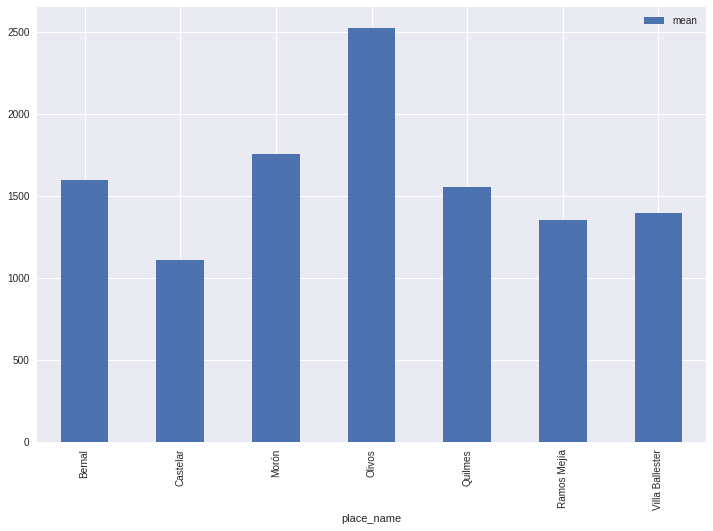

In [217]:
PHGBA.groupby('place_name').mean()['price_usd_per_m2'].plot(kind='bar',figsize=(12,8));